# Codes for Statistic Analysis for One Stop Cataract Surgery Referral

Please keep data format as previously recorded. If waiting time unavailable, please record it as 0 for the following codes to work. Please do not leave any space in the file name, use underscores instead.
 
The only line that needs to be changed is the first line under 'Import dataset'. Please change OSCSR_NEW in './OSCSR_NEW.csv' to the name of the new data file.

Any questions regarding the codes please contact via NHS email.

## Data Cleansing

### Import modules

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Import dataset

In [2]:
oscsr = './OSCSR_NEW.csv'
data_all = pd.read_csv(oscsr)
#data_all
#data_all.info()
#data_all = data_all.drop(columns=['Unnamed: 11'])
#data_all = data_all.drop(columns=['Unnamed: 12'])
#data_all = data_all.drop(columns=['Unnamed: 13'])
#data_all
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient                         125 non-null    int64  
 1   Waiting_Time                    125 non-null    float64
 2   Appropriate                     125 non-null    int64  
 3   Abnormal_Axial_Length           125 non-null    int64  
 4   Unable_To_Lie_Flat              125 non-null    int64  
 5   Brunescent_White_Cataract       125 non-null    int64  
 6   Restrcited_Retinal_View         125 non-null    int64  
 7   PXF_Phacodonesis                125 non-null    int64  
 8   On_Alpha_Blocker                125 non-null    int64  
 9   Intraoperative_Adjunt_Required  125 non-null    int64  
 10  Intracameral_Dilation_Required  125 non-null    int64  
 11  Other_Reason                    125 non-null    int64  
dtypes: float64(1), int64(11)
memory usag

In [3]:
#data_all['Appropriate'] = data_all['Appropriate'].fillna(0)
#data_all['Appropriate'] = data_all['Appropriate'].astype(int)
#data_all['Appropriate'].dropna()
#data_all['Appropriate']
#data_all.info()

### Analysis for waiting time

In [4]:
waiting_time = data_all.loc[data_all['Waiting_Time'] != 0 ,'Waiting_Time']

print(('Average waiting time from referral to surgery:'), (round(waiting_time.mean(), 1)),'months')

Average waiting time from referral to surgery: 12.2 months


### Appropraite referrals

In [5]:
app_ref = data_all['Appropriate'].sum()*100/data_all['Appropriate'].count()
inapp_ref = round((100-app_ref), 2)

print(('Proportion of approprate referrals:'), app_ref, '%')
print(('Proportion of inapproprate referrals:'), inapp_ref, '%')

Proportion of approprate referrals: 92.8 %
Proportion of inapproprate referrals: 7.2 %


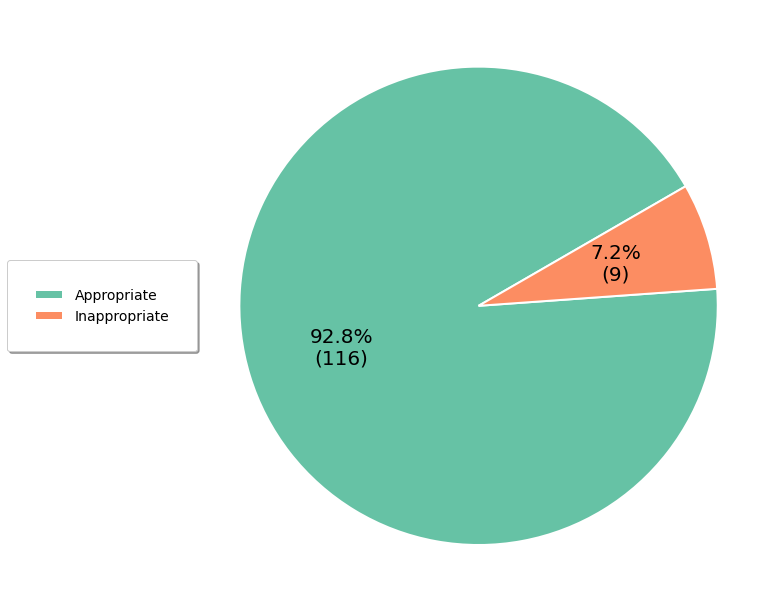

<Figure size 432x288 with 0 Axes>

In [20]:
total = len(data_all)
plt.figure(figsize = (15,11))
pie_ref = np.array([app_ref,inapp_ref])
plt.pie(pie_ref, colors = sns.color_palette('Set2'), autopct= lambda p:'{:.1f}%\n({:.0f})'.format(p, total*p/100), startangle = 30,  wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'}, textprops={'fontsize':20})
plt.legend(labels = ['Appropriate','Inappropriate'], loc="center left", bbox_to_anchor=(-0.3,0.5), fancybox=True, framealpha=1, shadow=True, borderpad=2, fontsize=14)

fig1 = plt.gcf()
plt.show()
plt.draw()
#fig1.savefig('app_ref.jpg', dpi=300)

### Analysis of reasons for inappropriate referral

In [7]:
data_inapp = data_all.loc[data_all['Appropriate'] == 0, :]
data_inapp = data_inapp.drop(columns=['Waiting_Time','Appropriate'])
data_inapp = data_inapp[data_inapp.columns[data_inapp.sum()>0]]

In [8]:
data_inapp

,Patient,On_Alpha_Blocker,Intraoperative_Adjunt_Required,Other_Reason
11,12,0,1,0
12,13,0,1,1
14,15,0,0,1
16,17,0,1,1
17,18,0,1,1
19,20,0,0,1
43,44,0,1,0
46,47,1,1,0
96,97,0,0,1


The perentage of the reason is: On_Alpha_Blocker and accounts for 11.1% % ( 1 cases)
The perentage of the reason is: Intraoperative_Adjunt_Required and accounts for 66.7% % ( 6 cases)
The perentage of the reason is: Other_Reason and accounts for 66.7% % ( 6 cases)
[1, 6, 6]


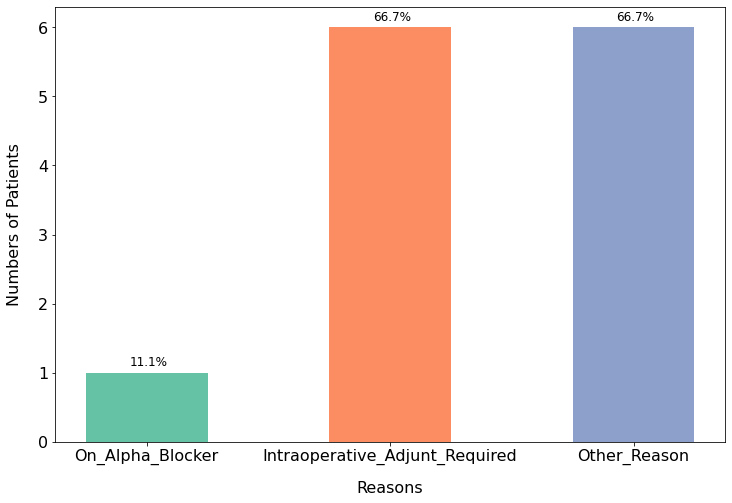

<Figure size 432x288 with 0 Axes>

In [18]:
inapp_reason = data_inapp.columns.values.tolist()
inapp_number = len(data_inapp)
inapp_list = list()
inapp_list_percent = list()

for i in range(1,len(inapp_reason)):
    a = data_inapp.iloc[:,i].sum()
    percent = str(round(((a/inapp_number)*100),1))+'%'
    print('The perentage of the reason is:', inapp_reason[i], 'and accounts for', percent, '%', '(', a, 'cases)')
    inapp_list.append(a)
    inapp_list_percent.append(percent)

print(inapp_list)

del inapp_reason[0]
plt.figure(figsize =(12,8))
bars_inapp = plt.bar(inapp_reason, inapp_list, color=sns.color_palette('Set2'), width = 0.5)
plt.xlabel('Reasons', size=16, labelpad=16)
plt.ylabel('Numbers of Patients', size=16, labelpad=16)
plt.xticks(rotation=0)

plt.rcParams['font.size'] = '16'
j=0
for bar in bars_inapp:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.18,
             yval+0.1,
             inapp_list_percent[j],
             size=12)
    j+=1
    
fig2 = plt.gcf()
plt.show()
plt.draw()
#fig2.savefig('inapp_reason.jpg', dpi=300)

### Analysis of factors increasing the complexity of the surgery

In [10]:
data_app = data_all.loc[data_all['Appropriate'] == 1, :]
data_app = data_app.drop(columns=['Waiting_Time','Appropriate'])

In [11]:
data_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 124
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Patient                         116 non-null    int64
 1   Abnormal_Axial_Length           116 non-null    int64
 2   Unable_To_Lie_Flat              116 non-null    int64
 3   Brunescent_White_Cataract       116 non-null    int64
 4   Restrcited_Retinal_View         116 non-null    int64
 5   PXF_Phacodonesis                116 non-null    int64
 6   On_Alpha_Blocker                116 non-null    int64
 7   Intraoperative_Adjunt_Required  116 non-null    int64
 8   Intracameral_Dilation_Required  116 non-null    int64
 9   Other_Reason                    116 non-null    int64
dtypes: int64(10)
memory usage: 10.0 KB


In [12]:
data_app.sum()

Patient                           7592
Abnormal_Axial_Length                3
Unable_To_Lie_Flat                   1
Brunescent_White_Cataract            2
Restrcited_Retinal_View              4
PXF_Phacodonesis                     0
On_Alpha_Blocker                     4
Intraoperative_Adjunt_Required      13
Intracameral_Dilation_Required      23
Other_Reason                         1
dtype: int64

The perentage of the reason is: Abnormal_Axial_Length and accounts for 2.6% % ( 3 cases)
The perentage of the reason is: Unable_To_Lie_Flat and accounts for 0.9% % ( 1 cases)
The perentage of the reason is: Brunescent_White_Cataract and accounts for 1.7% % ( 2 cases)
The perentage of the reason is: Restrcited_Retinal_View and accounts for 3.4% % ( 4 cases)
The perentage of the reason is: PXF_Phacodonesis and accounts for 0.0% % ( 0 cases)
The perentage of the reason is: On_Alpha_Blocker and accounts for 3.4% % ( 4 cases)
The perentage of the reason is: Intraoperative_Adjunt_Required and accounts for 11.2% % ( 13 cases)
The perentage of the reason is: Intracameral_Dilation_Required and accounts for 19.8% % ( 23 cases)
The perentage of the reason is: Other_Reason and accounts for 0.9% % ( 1 cases)
[3, 1, 2, 4, 0, 4, 13, 23, 1]


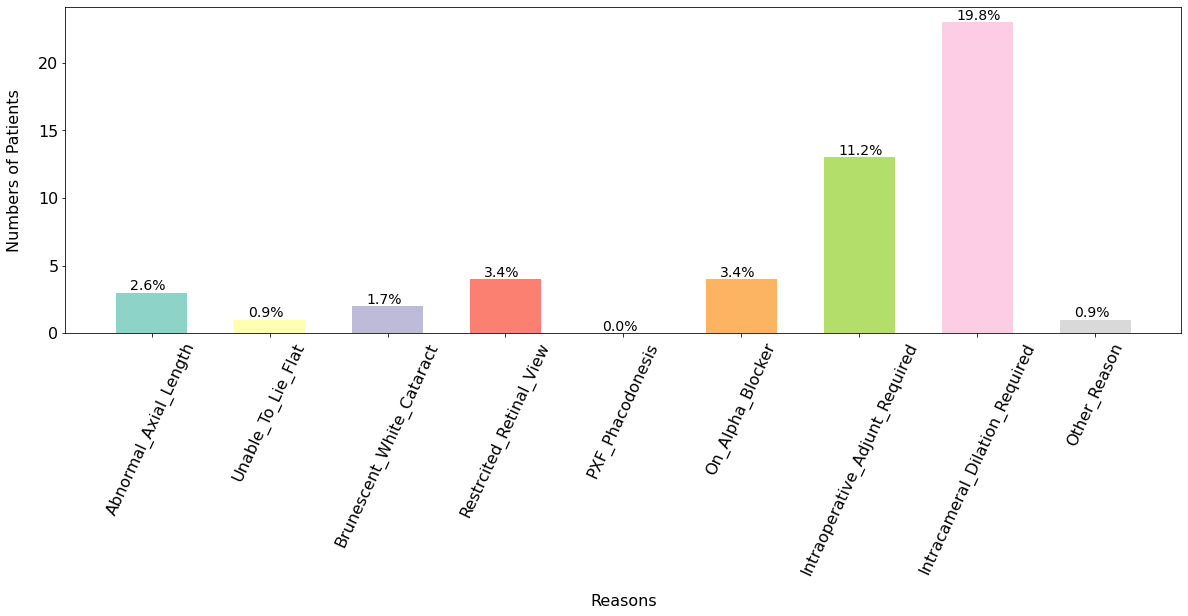

<Figure size 432x288 with 0 Axes>

In [62]:
app_reason = data_app.columns.values.tolist()
app_number = len(data_app)
app_list = list()
app_list_percent = list()

for i in range(1,len(app_reason)):
    a = data_app.iloc[:,i].sum()
    percent = str(round(((a/app_number)*100),1))+'%'
    print('The perentage of the reason is:', app_reason[i], 'and accounts for', percent, '%', '(', a, 'cases)')
    app_list.append(a)
    app_list_percent.append(percent)

print(app_list)

del app_reason[0]
plt.figure(figsize =(20,6))
bars_app = plt.bar(app_reason, app_list, color=sns.color_palette('Set3'), width = 0.6)
plt.xlabel('Reasons', size=16, labelpad=16)
plt.ylabel('Numbers of Patients', size=16, labelpad=16)
plt.xticks(rotation=65)

plt.rcParams['font.size'] = '16'
j=0
for bar in bars_app:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.12, yval+0.2, app_list_percent[j], size=14)
    j+=1

fig3 = plt.gcf()
plt.show()
plt.draw()
#fig3.savefig('app_reason.jpg', dpi=300)

### The following pie charts showed the proportions of factors increasing the complexity of the surgery. 

### Note that the percentage for each factor is different from that in the above bar chart. It is because the denominator in the bar chart is the number of all patients with appropriate referral (N=116), whereas in the pie chart the denominator is the total number of recorded reasons (N=51). However there may be more than one reason for each patient (N=32).
 
### It is therefore better to present through bar chart to reflect the factors in the whole cohort.

In [59]:
data_app_new = data_app.iloc[:,[1,2,3,4,5,6,7,8,9]]
data_app_new
reason_percent = data_app_new.loc[(data_app_new.sum(axis=1) != 0), :]
number_of_facotrs = reason_percent.to_numpy().sum()

print('Total number of patients with factors increasing the complexityof the surgery is', len(reason_percent))
print('Total number of factors is:',number_of_facotrs)


Total number of patients with factors increasing the complexityof the surgery is 32
Total number of factors is: 51


[ 3  1  2  4  0  4 13 23  1]


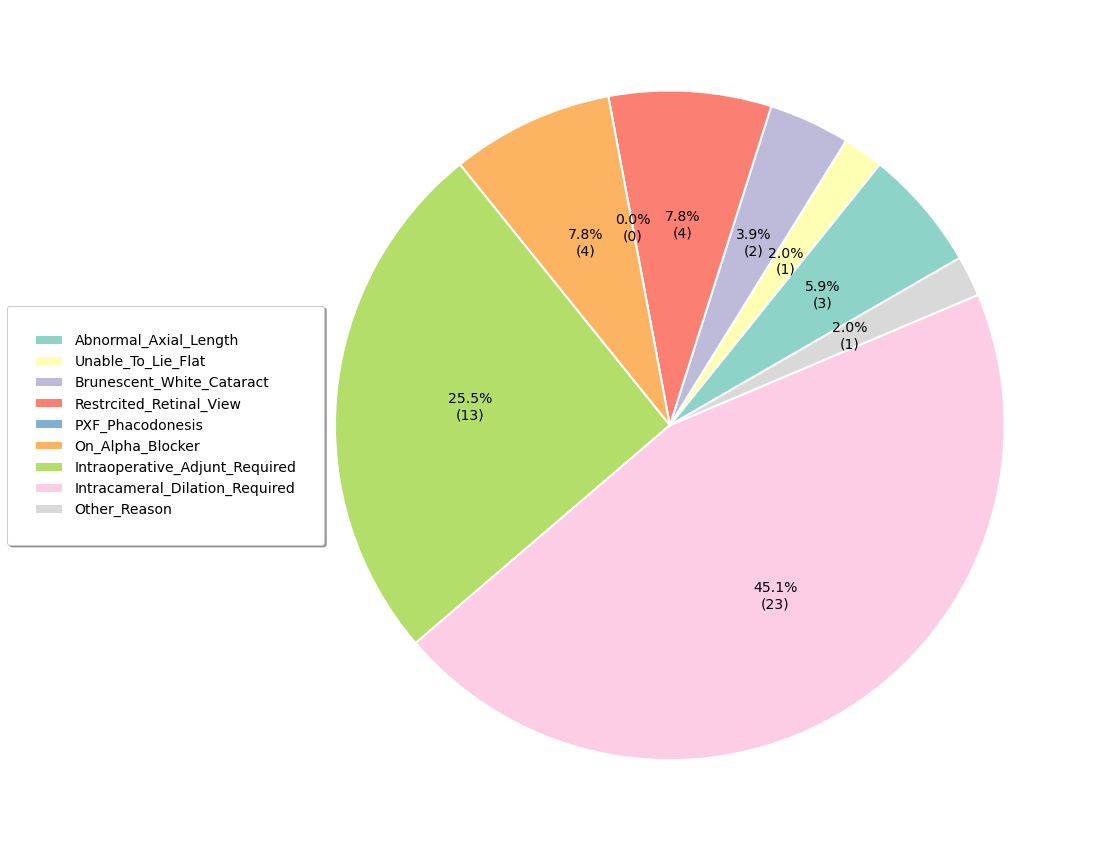

In [61]:
total_app = len(data_app)
plt.figure(figsize = (15,25))
pie_app = np.array(app_list)


plt.pie(pie_app, colors = sns.color_palette('Set3'), autopct= lambda p:'{:.1f}%\n({:,.0f})'.format(p, number_of_facotrs*p/100), startangle = 30,  wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'}, textprops={'fontsize':14})
plt.legend(labels = app_reason, loc="center left", bbox_to_anchor=(-0.3,0.5), fancybox=True, framealpha=1, shadow=True, borderpad=2, fontsize=14)

#fig1 = plt.gcf()
#plt.show()
#plt.draw()
#fig1.savefig('app_ref.jpg', dpi=300)